In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input/leapgestrecog/leapGestRecog"))


['03', '09', '08', '05', '00', '02', '01', '04', '06', '07']


In [2]:
from PIL import Image
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='../input/leapgestrecog/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

#import codecs
#import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes)

The different classes that exist in this dataset are:
{'07_ok', '09_c', '02_l', '06_index', '04_fist_moved', '01_palm', '05_thumb', '08_palm_moved', '10_down', '03_fist'}


In [7]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        #print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

      


*** 06 ***
*** 07 ***
*** 00 ***
*** 05 ***
*** 03 ***
*** 04 ***
*** 01 ***
*** 02 ***
*** 09 ***
*** 08 ***


Class Label: 1


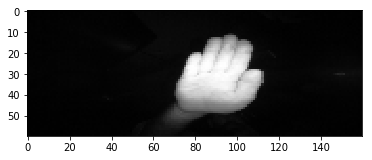

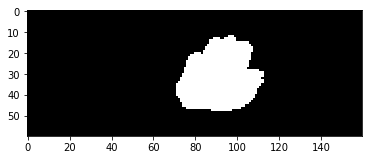

Class Label: 2


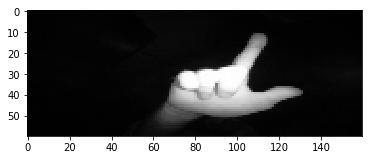

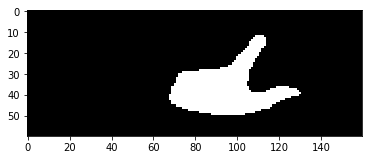

Class Label: 3


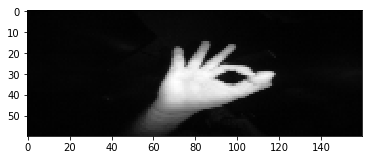

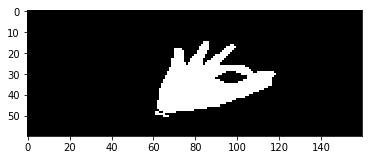

Class Label: 4


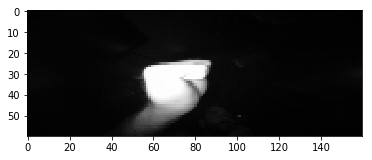

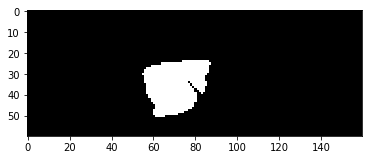

Class Label: 5


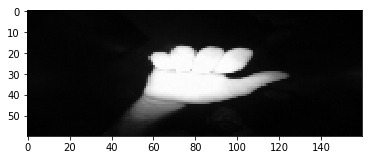

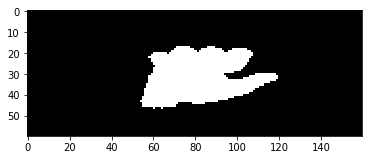

Class Label: 6


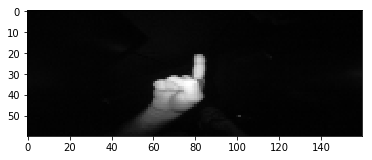

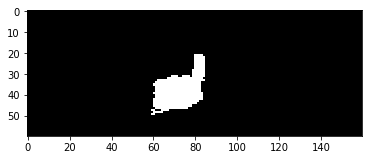

Class Label: 7


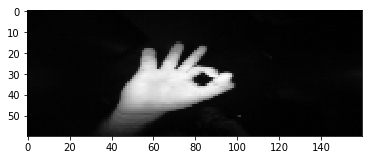

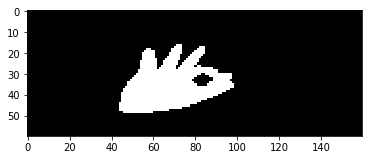

Class Label: 8


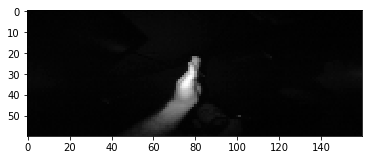

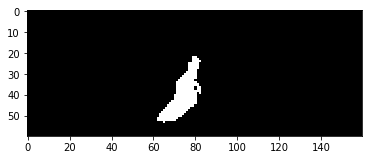

Class Label: 9


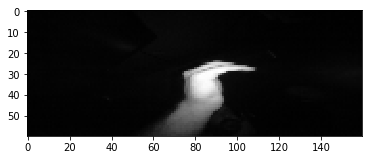

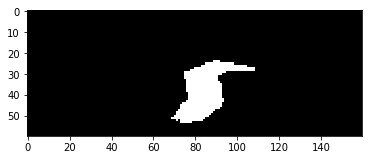

Class Label: 10


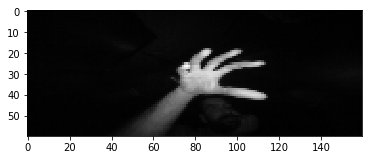

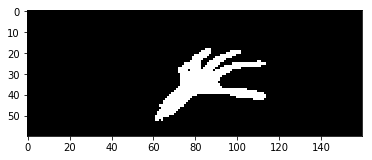

In [8]:
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()

In [25]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [42]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [43]:
len(x_data)



20000

## PCA and Pre-Processing the data

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
x_data=np.array(x_data)
print("Before PCA",x_data.shape)

Before PCA (20000, 9600)


In [45]:
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

print('___________________')
print("After PCA",x_data.shape)

[0.25498139 0.08075452 0.06690615 0.041779   0.03379988 0.03188952
 0.02433627 0.02123843 0.01862449 0.01679004 0.01509599 0.01309636
 0.01163084 0.01093524 0.00949862 0.00920235 0.00874918 0.00804046
 0.00764507 0.00756218]
[9.22598723e-05 5.19208767e-05 4.72597721e-05 3.73454460e-05
 3.35904763e-05 3.26274078e-05 2.85026765e-05 2.66268489e-05
 2.49345090e-05 2.36746969e-05 2.24486099e-05 2.09090286e-05
 1.97044441e-05 1.91061352e-05 1.78069220e-05 1.75270127e-05
 1.70900058e-05 1.63832165e-05 1.59753158e-05 1.58884709e-05]
___________________
After PCA (20000, 20)


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)


In [47]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
#The idea behind StandardScaler is that it will transform your data
#such that its distribution will have a mean value 0 and standard deviation of 1.
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_further)  

## SGD classifier

In [48]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='log',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test) 
y_train_score_sgd=sgd.predict(X_train)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_further, y_pred_sgd, normalize=True, sample_weight=None)
acc_train = accuracy_score(y_train, y_train_score_sgd, normalize=True, sample_weight=None)
print("accuracy of the model is:\nTest ", acc)
print('Train ',acc_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.69725
Train  0.7075625


## Decision tree

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

In [50]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [51]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.93425
Train 0.9490625


## Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [54]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.998
Train 1.0


## Logistic Regression

In [55]:


from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver = 'newton-cg')
logistic.fit(X_train, y_train)
y_pred_logistic=logistic.predict(X_test)
y_train_score_logistic=logistic.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_logistic, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_logistic, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy of the model is:
Test  0.69975
Train 0.7199375


## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)
y_train_score_gnb=gnb.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_gnb, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_gnb, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.645
Train 0.659


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Gradient Descent Classifier

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
gdc_model= GradientBoostingClassifier(learning_rate=0.01,random_state=41)
gdc_model.fit(x_train, y_train)
y_pred_gdc=gdc_model.predict(X_test)
y_train_score_gdc=gdc_model.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_gdc, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_gdc, normalize=True, sample_weight=None))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.09575
Train 0.1010625
